# **1.**  INSTALLING FFMPEG

In [ ]:
!sudo apt update
!sudo apt install -y ffmpeg

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,512 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [52.2 kB]
Get:13 http://archive.ubuntu.com/ubuntu jam

In [ ]:
!ffmpeg -version


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-l

# **2.** COLOR CONVERTER

In [ ]:
class ColorConverter:
    @staticmethod
    def rgb_to_yuv(r, g, b):
        print(f"Input RGB values: R={r}, G={g}, B={b}")
        # Fórmulas de conversión RGB a YUV
        y = round(0.299 * r + 0.587 * g + 0.114 * b, 2)
        u = round(-0.14713 * r - 0.28886 * g + 0.436 * b, 2)
        v = round(0.615 * r - 0.51499 * g - 0.10001 * b, 2)
        return y, u, v

    @staticmethod
    def yuv_to_rgb(y, u, v):
        print(f"Input YUV values: Y={y}, U={u}, V={v}")
        # Fórmulas de conversión YUV a RGB
        r = round(y + 1.13983 * v, 2)
        g = round(y - 0.39465 * u - 0.58060 * v, 2)
        b = round(y + 2.03211 * u, 2)
        return r, g, b


In [ ]:
# Valores de ejemplo
r, g, b = 100, 150, 200
y, u, v = ColorConverter.rgb_to_yuv(r, g, b)
print("Converted to YUV:", y, u, v)

r_new, g_new, b_new = ColorConverter.yuv_to_rgb(y, u, v)
print("Converted back to RGB:", r_new, g_new, b_new)


Input RGB values: R=100, G=150, B=200
Converted to YUV: 140.75 29.16 -35.75
Input YUV values: Y=140.75, U=29.16, V=-35.75
Converted back to RGB: 100.0 150.0 200.01


# **3.** RESIZING INTO LOWER QUALITY

In [ ]:
!ffmpeg -i /content/photo.jpg -vf scale=320:240 -q:v 30 /content/photo_low.jpg

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

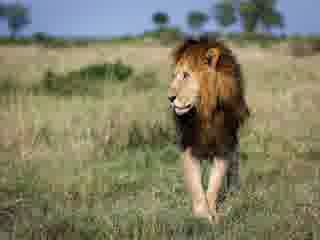

In [ ]:
from IPython.display import Image
Image('/content/photo_low.jpg')

In [ ]:
import subprocess

class ImageProcessor:
    @staticmethod
    def resize_image(input_file, output_file, width, height, quality):
        """
        Redimensiona una imagen usando FFmpeg.
        Args:
            input_file (str): Ruta del archivo de entrada.
            output_file (str): Ruta del archivo de salida.
            width (int): Ancho de la imagen redimensionada.
            height (int): Altura de la imagen redimensionada.
            quality (int): Nivel de calidad (mayor = peor calidad).
        """
        command = [
            "ffmpeg", "-i", input_file,
            "-vf", f"scale={width}:{height}",
            "-q:v", str(quality),
            output_file
        ]
        subprocess.run(command, check=True)
        print(f"Image resized and saved as {output_file}")


Image resized and saved as /content/photo_low_auto.jpg


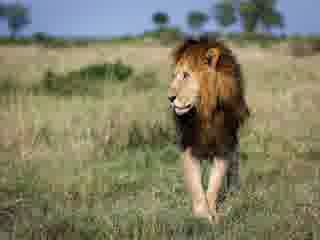

In [ ]:
# Usamos la imagen en /content/photo.jpg
input_image = '/content/photo.jpg'
output_image = '/content/photo_low_auto.jpg'

# Redimensionamos a 320x240 con calidad 30
ImageProcessor.resize_image(input_image, output_image, 320, 240, 30)

# Verificamos el resultado
from IPython.display import Image
Image(output_image)

# **4.** SERPENTINE

In [ ]:
class JPEGProcessor:
    @staticmethod
    def serpentine(file_path):
        """
        Lee los bytes de un archivo JPEG y los recorre en un patrón serpentino.
        Args:
            file_path (str): Ruta al archivo JPEG.
        Returns:
            list: Lista de bytes en orden serpentino.
        """
        # Abrimos el archivo en modo binario y leemos los datos
        with open(file_path, "rb") as file:
            data = file.read()

        # Creamos una matriz ficticia para simular las filas (aquí usamos filas de 16 bytes por ejemplo)
        rows = [data[i:i+16] for i in range(0, len(data), 16)]

        # Recorremos en patrón serpentino
        serpentine_bytes = []
        for i, row in enumerate(rows):
            if i % 2 == 0:  # Fila normal (izquierda a derecha)
                serpentine_bytes.extend(row)
            else:  # Fila invertida (derecha a izquierda)
                serpentine_bytes.extend(row[::-1])

        return serpentine_bytes


In [ ]:
# Archivo JPEG de prueba
file_path = '/content/photo_low.jpg'

# Obtenemos los bytes en patrón serpentino
serpentine_bytes = JPEGProcessor.serpentine(file_path)

# Mostramos los primeros 100 bytes
print("First 100 bytes (serpentine order):", serpentine_bytes[:100])


First 100 bytes (serpentine order): [255, 216, 255, 224, 0, 16, 74, 70, 73, 70, 0, 1, 2, 0, 0, 9, 49, 46, 56, 53, 99, 118, 97, 76, 17, 0, 254, 255, 0, 0, 8, 0, 51, 52, 46, 49, 48, 48, 0, 255, 219, 0, 67, 0, 8, 60, 60, 71, 97, 97, 101, 101, 101, 97, 90, 97, 82, 82, 82, 82, 82, 82, 71, 60, 97, 97, 101, 101, 101, 108, 108, 108, 127, 127, 127, 108, 108, 108, 101, 101, 150, 142, 142, 131, 127, 131, 131, 138, 142, 138, 127, 127, 120, 120, 108, 108, 150, 150, 180, 180]


# **5.** TRANSFORM INTO B/W

In [ ]:
!ffmpeg -i /content/photo_low.jpg -vf format=gray -q:v 30 /content/photo_bw.jpg

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

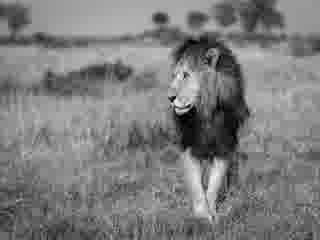

In [ ]:
from IPython.display import Image
Image('/content/photo_bw.jpg')

In [ ]:
class ImageProcessor:

    @staticmethod
    def compress_to_bw(input_file, output_file, compression_level):
        """
        Convierte una imagen a blanco y negro y la comprime.
        Args:
            input_file (str): Ruta del archivo de entrada.
            output_file (str): Ruta del archivo de salida.
            compression_level (int): Nivel de compresión (mayor = más compresión).
        """
        command = [
            "ffmpeg", "-i", input_file,
            "-vf", "format=gray",
            "-q:v", str(compression_level),
            output_file
        ]
        subprocess.run(command, check=True)
        print(f"Black-and-white compressed image saved as {output_file}")


Black-and-white compressed image saved as /content/photo_bw_auto.jpg


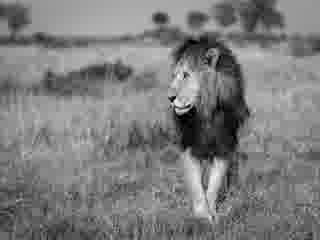

In [ ]:
# Archivo de entrada y salida
input_image = '/content/photo_low.jpg'
output_image = '/content/photo_bw_auto.jpg'

# Convertimos a blanco y negro con máxima compresión
ImageProcessor.compress_to_bw(input_image, output_image, 50)

# Mostramos la imagen resultante
from IPython.display import Image
Image(output_image)

In [ ]:
import os

# Rutas de los archivos
original_file = '/content/photo_low.jpg'
compressed_file = '/content/photo_bw_auto.jpg'

# Tamaños en bytes
original_size = os.path.getsize(original_file)
compressed_size = os.path.getsize(compressed_file)

# Mostramos resultados
print(f"Tamaño del archivo original: {original_size} bytes")
print(f"Tamaño del archivo comprimido: {compressed_size} bytes")
print(f"Reducción: {original_size - compressed_size} bytes ({(1 - compressed_size/original_size) * 100:.2f}%)")


Tamaño del archivo original: 3024 bytes
Tamaño del archivo comprimido: 3184 bytes
Reducción: -160 bytes (-5.29%)


Imagen original:


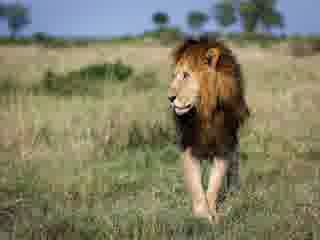

Imagen comprimida en blanco y negro:


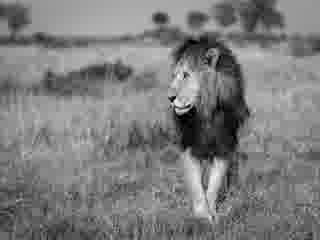

In [ ]:
from IPython.display import display, Image

print("Imagen original:")
display(Image(original_file))

print("Imagen comprimida en blanco y negro:")
display(Image(compressed_file))


# **6.** RUN-LENGHT ENCODING

In [ ]:
class CompressionUtils:
    @staticmethod
    def run_length_encoding(byte_sequence):
        """
        Aplica el algoritmo Run-Length Encoding (RLE) sobre una secuencia de bytes.
        Args:
            byte_sequence (list): Lista de bytes a comprimir.
        Returns:
            list: Lista de tuplas (byte, repeticiones) que representan la secuencia comprimida.
        """
        encoded = []
        i = 0
        while i < len(byte_sequence):
            count = 1
            while i + 1 < len(byte_sequence) and byte_sequence[i] == byte_sequence[i + 1]:
                i += 1
                count += 1
            encoded.append((byte_sequence[i], count))
            i += 1
        return encoded


In [ ]:
# Usamos los bytes de la imagen en blanco y negro comprimida
with open('/content/photo_bw_auto.jpg', 'rb') as f:
    byte_sequence = list(f.read())

# Aplicamos Run-Length Encoding
encoded_bytes = CompressionUtils.run_length_encoding(byte_sequence)

# Mostramos los primeros 10 elementos de la secuencia codificada
print("Primeros 10 elementos del RLE:", encoded_bytes[:10])


Primeros 10 elementos del RLE: [(255, 1), (216, 1), (255, 1), (224, 1), (0, 1), (16, 1), (74, 1), (70, 1), (73, 1), (70, 1)]


# **7.** DCT PROCESSOR

In [ ]:
import numpy as np
from scipy.fftpack import dct, idct

class DCTProcessor:
    def __init__(self, image_data):
        """
        Constructor que recibe los datos de la imagen (como un array 2D).
        """
        self.image_data = image_data

    def apply_dct(self):
        """
        Aplica la transformada discreta del coseno (DCT) a los datos de la imagen.
        Devuelve los coeficientes de la DCT en las direcciones de filas y columnas.
        """
        # Aplicamos DCT bidimensional (primero sobre filas, luego sobre columnas)
        dct_image = dct(dct(self.image_data.T, norm='ortho').T, norm='ortho')
        return dct_image

    def apply_idct(self, dct_image):
        """
        Aplica la inversa de la transformada discreta del coseno (IDCT) para reconstruir la imagen.
        """
        # Aplicamos la IDCT bidimensional
        idct_image = idct(idct(dct_image.T, norm='ortho').T, norm='ortho')
        return np.uint8(np.clip(idct_image, 0, 255))  # Aseguramos que los valores estén en el rango [0, 255]


In [ ]:
from PIL import Image
import numpy as np
from scipy.fftpack import dct, idct

# Cargamos la imagen comprimida y convertirla a escala de grises
image_path = '/content/photo_bw_auto.jpg'
img = Image.open(image_path).convert('L')  # 'L' para convertir a escala de grises

# Convertimos la imagen en una matriz 2D
image_data = np.array(img)

# Creamos una instancia del procesador DCT
dct_processor = DCTProcessor(image_data)

# Aplicamos la DCT
dct_image = dct_processor.apply_dct()

# Mostramos los coeficientes de la DCT (visualización del DCT de la imagen)
print("Coeficientes de la DCT (transformada):")
print(dct_image)

# Reconstruimos la imagen con la IDCT
reconstructed_image = dct_processor.apply_idct(dct_image)

# Mostramos la imagen reconstruida
reconstructed_img = Image.fromarray(reconstructed_image)
reconstructed_img.show()

Coeficientes de la DCT (transformada):
[[ 3.45166116e+04  7.67630307e+02  2.88713396e+01 ...  1.39490585e+01
   6.12410579e+00  3.87407362e-01]
 [ 2.04980794e+03  8.77462974e+02  1.57324390e+02 ...  2.02022074e+00
   1.90995991e+00 -2.53067958e+00]
 [-5.93125931e+02 -7.25825611e+02 -2.52383902e+03 ...  9.27488388e+00
   2.81686547e-01  1.02031844e+01]
 ...
 [ 5.23485550e+00 -5.16717721e+00 -8.88705984e+00 ... -1.90180042e-01
  -1.33084445e+00  2.83212116e-01]
 [ 7.44283548e+00  2.32195663e+00  4.49053149e+00 ... -7.09761114e-01
  -7.22365490e-01  7.84371125e-01]
 [-4.30766095e+00  8.27981146e+00  6.65212729e+00 ...  2.52316351e-01
   2.22070924e-01 -1.16386827e+00]]


# **8.** DWT PROCESSOR




In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 25.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pywt

class DWTProcessor:
    def __init__(self, image_data):
        """
        Constructor que recibe los datos de la imagen (como un array 2D).
        """
        self.image_data = image_data

    def apply_dwt(self):
        """
        Aplica la transformada discreta de wavelet (DWT) a los datos de la imagen.
        Devuelve los coeficientes de aproximación y detalle.
        """
        coeffs2 = pywt.dwt2(self.image_data, 'bior1.3')  # Usando wavelet biortogonal 1.3
        LL, (LH, HL, HH) = coeffs2  # Los 4 coeficientes: aproximación y 3 detalles
        return LL, LH, HL, HH

    def apply_idwt(self, LL, LH, HL, HH):
        """
        Aplica la inversa de la transformada discreta de wavelet (IDWT) para reconstruir la imagen.
        """
        return pywt.idwt2((LL, (LH, HL, HH)), 'bior1.3')


In [ ]:
from PIL import Image
import numpy as np

# Cargamos la imagen comprimida y convertimos a escala de grises
image_path = '/content/photo_bw_auto.jpg'
img = Image.open(image_path).convert('L')  # 'L' para convertir a escala de grises

# Convertimos la imagen en una matriz 2D
image_data = np.array(img)

# Creamos una instancia del procesador DWT
dwt_processor = DWTProcessor(image_data)

# Aplicamos DWT
LL, LH, HL, HH = dwt_processor.apply_dwt()

# Mostramos los coeficientes de aproximación y detalle
print("Coeficiente de aproximación (LL):")
print(LL)
print("\nCoeficiente de detalle (LH):")
print(LH)
print("\nCoeficiente de detalle (HL):")
print(HL)
print("\nCoeficiente de detalle (HH):")
print(HH)

# Reconstruimos la imagen con la IDWT
reconstructed_image = dwt_processor.apply_idwt(LL, LH, HL, HH)

# Mostramos la imagen reconstruida
reconstructed_img = Image.fromarray(reconstructed_image)
reconstructed_img.show()


Coeficiente de aproximación (LL):
[[273.5       273.5       284.7421875 ... 300.        300.
  300.       ]
 [273.5       273.5       284.7421875 ... 300.        300.
  300.       ]
 [237.203125  237.203125  248.4921875 ... 300.        300.
  300.       ]
 ...
 [210.        210.        210.        ... 204.875     204.375
  204.375    ]
 [210.        210.        210.        ... 204.875     204.375
  204.375    ]
 [210.        210.        210.        ... 204.875     204.375
  204.375    ]]

Coeficiente de detalle (LH):
[[-5.     -5.     -5.     ...  0.      0.      0.    ]
 [ 5.      5.      5.     ...  0.      0.      0.    ]
 [12.     12.     11.9375 ...  0.      0.      0.    ]
 ...
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]]

Coeficiente de detalle (HL):
[[ 1.     -1.     -4.     ...  0.      0.      0.    ]
 [ 1.     -1.     -4.     ...  0.      0.      0.    ]
 

# **9.** UNIT TESTS

In [ ]:
import unittest

class TestColorConverter(unittest.TestCase):

    def test_rgb_to_yuv(self):
        # Probar la conversión de RGB a YUV
        rgb = (100, 150, 200)
        expected_yuv = (140.75, 29.16, -35.75)

        yuv = ColorConverter.rgb_to_yuv(*rgb)

        # Verificar que los resultados estén dentro de un margen de error mayor
        self.assertAlmostEqual(yuv[0], expected_yuv[0], places=2)
        self.assertAlmostEqual(yuv[1], expected_yuv[1], places=5)
        self.assertAlmostEqual(yuv[2], expected_yuv[2], places=5)

    def test_yuv_to_rgb(self):
        # Probar la conversión de YUV a RGB
        yuv = (140.75, 29.16, -35.75)  # YUV para (255, 0, 0)
        expected_rgb = (100, 150, 200)  # RGB esperado

        rgb = ColorConverter.yuv_to_rgb(*yuv)

        # Verificar que los resultados estén dentro de un margen de error
        self.assertAlmostEqual(rgb[0], expected_rgb[0], places=0)
        self.assertAlmostEqual(rgb[1], expected_rgb[1], places=0)
        self.assertAlmostEqual(rgb[2], expected_rgb[2], places=0)


if __name__ == '__main__':
    unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestColorConverter))



..
----------------------------------------------------------------------
Ran 2 tests in 0.009s

OK


Input RGB values: R=100, G=150, B=200
Input YUV values: Y=140.75, U=29.16, V=-35.75


In [ ]:
import os

class TestImageCompression(unittest.TestCase):

    def test_image_compression(self):
        input_image = '/content/photo.jpg'
        output_image = '/content/photo_compressed.jpg'

        # Usamos FFmpeg para comprimir la imagen
        os.system(f'ffmpeg -i {input_image} -q:v 10 {output_image}')  # Usamos un factor de calidad bajo (10)

        # Verificamos que el archivo comprimido exista
        self.assertTrue(os.path.exists(output_image), "Comprimido: El archivo no se ha creado")

        # Comprobamos el tamaño del archivo original y comprimido
        original_size = os.path.getsize(input_image)
        compressed_size = os.path.getsize(output_image)

        print(f"Tamaño original: {original_size} bytes")
        print(f"Tamaño comprimido: {compressed_size} bytes")

        # Comprobamos que el tamaño comprimido sea menor que el original
        self.assertLess(compressed_size, original_size, "El archivo comprimido es más grande que el original")

        # Limpiar el archivo comprimido después de la prueba
        os.remove(output_image)

if __name__ == '__main__':
    unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestImageCompression))

.
----------------------------------------------------------------------
Ran 1 test in 0.328s

OK


Tamaño original: 1039463 bytes
Tamaño comprimido: 459832 bytes


In [ ]:
class TestJPEGProcessor(unittest.TestCase):

    def test_serpentine(self):
        # Definir el archivo de entrada JPEG
        file_path = '/content/photo.jpg'  # Cambia esto a la ruta de tu imagen JPEG

        # Ejecutar el método serpentine
        serpentine_bytes = JPEGProcessor.serpentine(file_path)

        # Verificar que se ha leído alguna cantidad de bytes
        self.assertGreater(len(serpentine_bytes), 0, "No se han leído bytes del archivo JPEG.")

        # Verificar que el patrón serpentino tiene la longitud correcta
        # Por ejemplo, verificamos si la longitud es la misma que la longitud del archivo dividido por 16 (simulando filas de 16 bytes)
        with open(file_path, 'rb') as file:
            file_data = file.read()
            expected_length = len(file_data)
            self.assertEqual(len(serpentine_bytes), expected_length, "La longitud de los bytes en patrón serpentino no coincide con la longitud esperada.")

if __name__ == '__main__':
    unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestJPEGProcessor))


.
----------------------------------------------------------------------
Ran 1 test in 0.057s

OK


In [ ]:
class TestImageProcessor(unittest.TestCase):

    def test_compress_to_bw(self):
        # Definir las rutas de entrada y salida
        input_file = '/content/photo.jpg'  # Cambia esto a la ruta de tu imagen
        output_file = '/content/photo_bw_compressed.jpg'
        compression_level = 10  # Nivel de compresión (ajústalo según sea necesario)

        # Ejecutar la conversión a blanco y negro con compresión
        ImageProcessor.compress_to_bw(input_file, output_file, compression_level)

        # Verificar que el archivo de salida se haya creado
        self.assertTrue(os.path.exists(output_file), "El archivo comprimido no fue creado.")

        # Verificar que la imagen convertida y comprimida tiene un tamaño razonable
        original_size = os.path.getsize(input_file)
        compressed_size = os.path.getsize(output_file)
        self.assertLess(compressed_size, original_size, "El archivo comprimido debería ser más pequeño que el archivo original.")

        # Limpiar el archivo de salida después de la prueba
        os.remove(output_file)

if __name__ == '__main__':
    unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestImageProcessor))


.
----------------------------------------------------------------------
Ran 1 test in 0.645s

OK


Black-and-white compressed image saved as /content/photo_bw_compressed.jpg


In [ ]:
class TestRLE(unittest.TestCase):

    def test_rle_encoding_decoding(self):
        # Secuencia de bytes de prueba
        original_data = [1, 1, 1, 0, 0, 2, 2, 2, 2, 3]

        # Codificamos la secuencia
        encoded_data = RLE.encode(original_data)
        print(f"Datos codificados: {encoded_data}")

        # Decodificamos la secuencia
        decoded_data = RLE.decode(encoded_data)
        print(f"Datos decodificados: {decoded_data}")

        # Comprobamos que los datos originales y decodificados sean iguales
        self.assertEqual(original_data, decoded_data, "Los datos decodificados no coinciden con los originales")

if __name__ == '__main__':
    unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestRLE))

.
----------------------------------------------------------------------
Ran 1 test in 0.011s

OK


Datos codificados: [(1, 3), (0, 2), (2, 4), (3, 1)]
Datos decodificados: [1, 1, 1, 0, 0, 2, 2, 2, 2, 3]


In [ ]:
import numpy as np
from PIL import Image
from scipy.fftpack import dct, idct

class TestDCTProcessor(unittest.TestCase):

    def setUp(self):
        """
        Configuración inicial para las pruebas. Carga una imagen de prueba y la convierte en escala de grises.
        """
        image_path = '/content/photo_bw_auto.jpg'  # Ajusta esta ruta si es necesario
        img = Image.open(image_path).convert('L')
        self.image_data = np.array(img)
        self.dct_processor = DCTProcessor(self.image_data)

    def test_dct(self):
        """
        Verifica que la DCT se aplique correctamente.
        La imagen transformada no debe ser igual a la original.
        """
        dct_image = self.dct_processor.apply_dct()
        # Aseguramos que los coeficientes de DCT no sean iguales a la imagen original
        self.assertFalse(np.array_equal(dct_image, self.image_data), "La DCT no se aplicó correctamente")

    def test_idct(self):
        """
        Verifica que la IDCT reconstruya la imagen correctamente.
        La imagen reconstruida debe ser lo más parecida posible a la original.
        """
        dct_image = self.dct_processor.apply_dct()
        reconstructed_image = self.dct_processor.apply_idct(dct_image)
        # Comprobamos que la imagen reconstruida sea parecida a la original
        self.assertTrue(np.allclose(self.image_data, reconstructed_image, atol=1), "La imagen reconstruida no coincide con la original")

    def test_pixel_range(self):
        """
        Verifica que los valores de píxel en la imagen reconstruida estén dentro del rango [0, 255].
        """
        dct_image = self.dct_processor.apply_dct()
        reconstructed_image = self.dct_processor.apply_idct(dct_image)
        # Comprobamos que los valores de la imagen reconstruida estén dentro del rango [0, 255]
        self.assertTrue(np.all((reconstructed_image >= 0) & (reconstructed_image <= 255)), "Los valores de los píxeles están fuera del rango [0, 255]")

if __name__ == '__main__':
    unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestDCTProcessor))


...
----------------------------------------------------------------------
Ran 3 tests in 0.025s

OK


In [ ]:
import pywt

class TestDWT(unittest.TestCase):

    def test_dwt_idwt(self):
        # Crear una matriz de datos (simulando una imagen de 4x4)
        original_data = np.array([[1, 2, 3, 4],
                                  [5, 6, 7, 8],
                                  [9, 10, 11, 12],
                                  [13, 14, 15, 16]])

        # Aplicar DWT
        coeffs = DWTTransformer.apply_dwt(original_data)
        print(f"Coeficientes DWT: {coeffs}")

        # Aplicar la transformada inversa (IDWT)
        reconstructed_data = DWTTransformer.apply_idwt(coeffs)
        print(f"Datos reconstruidos (IDWT): {reconstructed_data}")

        # Comprobamos que los datos originales y los reconstruidos sean iguales
        np.testing.assert_almost_equal(original_data, reconstructed_data, decimal=2, err_msg="Los datos reconstruidos no coinciden con los originales")

if __name__ == '__main__':
    unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestDWT))


.
----------------------------------------------------------------------
Ran 1 test in 0.009s

OK


Coeficientes DWT: (array([[ 7., 11.],
       [23., 27.]]), (array([[-4., -4.],
       [-4., -4.]]), array([[-1., -1.],
       [-1., -1.]]), array([[ 0.0000000e+00,  4.4408921e-16],
       [-4.4408921e-16,  0.0000000e+00]])))
Datos reconstruidos (IDWT): [[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]
